In [ ]:
# Importing relevant libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sea

### **1. Initial Investigation**

In [ ]:
# Loading the dataset and displaying the first 10 rows
health_data = pd.read_csv('healthcare_dataset.csv')
health_data.head()

<ipython-input-2-eda11923aba4>:2: DtypeWarning: Columns (16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  health_data = pd.read_csv('healthcare_dataset.csv')


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,BloodPressure,SkinThickness,Insulin,Id
0,Bobby JacksOn,30.0,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,...,True,False,False,False,False,True,72.0,35.0,0.0,1
1,LesLie TErRy,62.0,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,...,False,False,False,False,False,True,66.0,29.0,0.0,2
2,DaNnY sMitH,76.0,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,...,False,False,False,False,False,True,64.0,0.0,0.0,3
3,andrEw waTtS,28.0,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,...,False,False,False,False,False,True,66.0,23.0,94.0,4
4,adrIENNE bEll,43.0,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,14238.31781,...,True,True,False,False,False,True,40.0,35.0,168.0,5


In [ ]:
# Shape of our data (rows, columns)
print(health_data.shape)

(55781, 27)


In [ ]:
# Investigating our data further
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55781 entries, 0 to 55780
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55631 non-null  float64
 2   Gender              55750 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55760 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55636 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55722 non-null  object 
 9   Billing Amount      55628 non-null  float64
 10  Room Number         55500 non-null  float64
 11  Admission Type      55645 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55626 non-null  object 
 14  Test Results        55500 non-null  object 
 15  Neighbourhood       55760 non-null  object 
 16  Scho

In [ ]:
# Number of missing values in each column of our data
# Any column that is not displayed, will be assumed not to contain any missing values for now
missing_val_count = (health_data.isnull().sum())
print(missing_val_count[missing_val_count > 0])

Name                    281
Age                     150
Gender                   31
Blood Type              281
Medical Condition        21
Date of Admission       281
Doctor                  145
Hospital                281
Insurance Provider       59
Billing Amount          153
Room Number             281
Admission Type          136
Discharge Date          281
Medication              155
Test Results            281
Neighbourhood            21
Scholarship              21
Hipertension             21
Diabetes                 21
Alcoholism               21
Handcap                  21
SMS_received             21
Showed_up                21
BloodPressure         53013
SkinThickness         53013
Insulin               53013
Id                    27344
dtype: int64


From my initial investigation, I have concluded a few key points about our dataset that will be considered going forward:
*   Out dataset has a total of 27 features and 55,781 entries (number of patients).
*   Majority of the missing values are in the following columns: 'BloodPressure', 'SkinThickness', 'Insulin' and 'Id'.
*   From the data description and a quick glance, it is not clear why there are missing values. There is a combination of values missing at random and values that are not missing at random - we can establish relationships with missing values with other features in the dataset.
*   Due to the large number of missing values for these 4 columns specifically, I have decided that data imputation techniques would be too much of a risk and I have opted to attempt to engineer features by making inferences from the other features in the dataset.
*   The 'Id' column starts, ends and restarts again at, what we will assume are random intervals, throughout our data. This means that we could either replace all of the values to represent a regular ordinal count or drop the column altogether.
*   As for the remaining three columns, it appears that we can use other features to make assumptions for these values. For instance, 'BloodPressure' could be related to features like 'Hipertension' and 'Alcoholism'. While features like 'Insulin' and 'SkinThickness' could be related to 'Diabetes' or even 'Medication'.
*   The entries in the 'Name' column are distorted and inconsistent.

Some of these are merey initial inferences and assumptions which will need to be tested before any conclusions are made.

In [ ]:
# Correcting the distortion in 'Name' column values
# In our code we will be using lambda expressions, which are a short way for defining simple functions
# Split the names into individual words by mapping the split method on each of them
health_data['Name'] = health_data['Name'].astype(str) # Some 'Name' values were being identified as float so this line adresses that
health_data['name_split'] = health_data['Name'].map(lambda Name: Name.split())

# Capitalizing the first letter of each word and joining them together
health_data['capitalized'] = health_data['name_split'].map(lambda words: [word.capitalize() for word in words])
health_data['Name'] = health_data['capitalized'].map(lambda words: " ".join(words))

# Drop the the columns we created for this procedure
health_data = health_data.drop(columns=['name_split', 'capitalized'])

In [ ]:
# Extracting a random sample of 5 records from our dataset
health_data.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,BloodPressure,SkinThickness,Insulin,Id
31121,Amy Frazier,36.0,Male,A+,Cancer,6/11/21,Elizabeth Mendoza,Curtis LLC,Aetna,4262.282468,...,False,False,False,False,False,True,NaN,NaN,NaN,NaN
4335,Brandon Rubio,24.0,Male,AB+,Obesity,27/04/2021,Melissa Fritz,"Bennett Grant and Anderson,",Medicare,5777.076834,...,False,False,False,False,True,True,NaN,NaN,NaN,NaN
44642,Debbie Kelley,40.0,Female,B+,Obesity,16/05/2021,Ryan Padilla,Castaneda-Morris,Medicare,27445.929560,...,True,False,False,False,False,True,NaN,NaN,NaN,1404
17719,Linda Hernandez,19.0,Male,B-,Obesity,22/02/2022,Jose Bowers,"and Mclean Brown, Martinez",Cigna,40080.935270,...,False,False,False,False,False,True,NaN,NaN,NaN,1337
13836,Jesse Harris,56.0,Male,B-,Hypertension,7/8/19,Shelley Harper,"Wells Rivera, Stokes and",Cigna,9588.413078,...,False,False,False,False,False,True,NaN,NaN,NaN,NaN


In [ ]:
# Check for duplicate values
health_data.duplicated().sum()

7

In [ ]:
# Dropping duplicate values
health_data.drop_duplicates(inplace =True)

**Goal:** For this dataset, I want to use the information we have about our patients to build a model that can predict the patients test results.

### **Exploratory Data Analysis**

First, it would be good to go into our analysis knowing some of the positively and negatively correlated features in our dataset.

In [ ]:
# Selecting only the numeric columns before calculating correlation
numeric_data = health_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_matrix

,Age,Billing Amount,Room Number,BloodPressure,SkinThickness,Insulin
Age,1.000000,-0.003925,-0.000720,-0.021088,-0.016933,-0.002503
Billing Amount,-0.003925,1.000000,-0.002943,-0.017763,0.006863,-0.003684
Room Number,-0.000720,-0.002943,1.000000,0.002161,0.005290,-0.014576
BloodPressure,-0.021088,-0.017763,0.002161,1.000000,0.201167,0.087823
SkinThickness,-0.016933,0.006863,0.005290,0.201167,1.000000,0.445345
Insulin,-0.002503,-0.003684,-0.014576,0.087823,0.445345,1.000000


### **2. Univariate data analysis**

In this type of analysis, we fcous on describing and visualizing the characteristics of a single feature.

For my univariate analysis, I will not be analyzing all of the features but only a select number of features that I feel may give more insight for my feature selection and decisions pertaining to my model.

In [ ]:
# Set up default plot size and style
plt.rcParams["figure.figsize"] = [8,6]
sea.set_style("darkgrid")

<Axes: xlabel='Test Results', ylabel='count'>

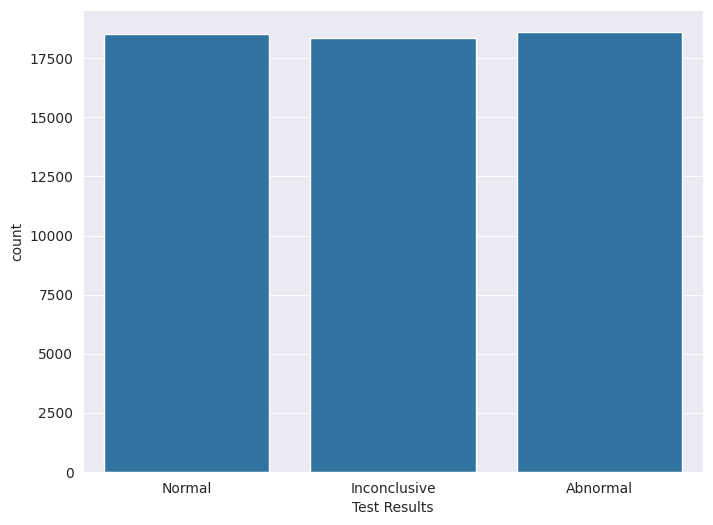

In [ ]:
# Visualizing the distribution of categories in our target variable
sea.countplot(x = health_data["Test Results"])

In [ ]:
health_data["Test Results"].value_counts()

,count
Test Results,
Abnormal,18627
Normal,18517
Inconclusive,18356


<Axes: xlabel='Gender', ylabel='count'>

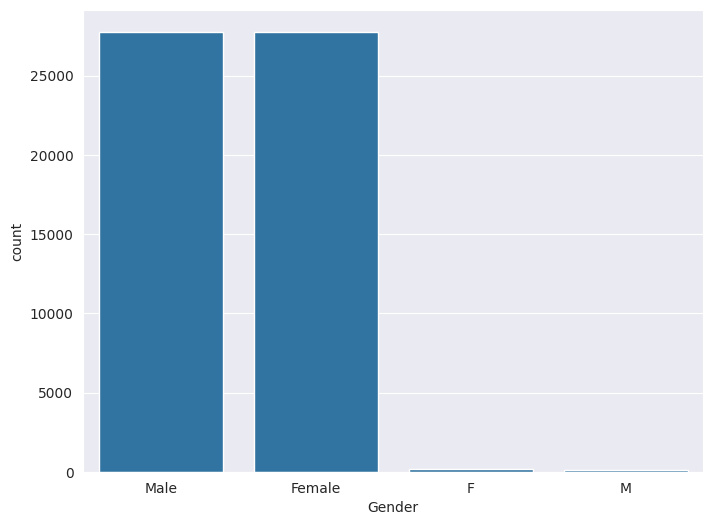

In [ ]:
# Visualizing the number of male and female patients
sea.countplot(x = health_data["Gender"])

In [ ]:
health_data["Gender"].value_counts()

,count
Gender,
Male,27774
Female,27726
F,163
M,80


From the count plot, the number of male and female patients looks roughly equal. The value count shows there are slightly more entries for female patients. Additionally, it looks like some 'Gender' entries were made in the as 'M' and 'F' to represent males and females respectively. This is an issue that needs to be corrected.

In [ ]:
# Replacing 'M' and 'F' entries with 'Male' and 'Female' respectively
health_data['Gender'] = health_data['Gender'].replace({'M': 'Male', 'F': 'Female'})

<Axes: xlabel='Medical Condition', ylabel='count'>

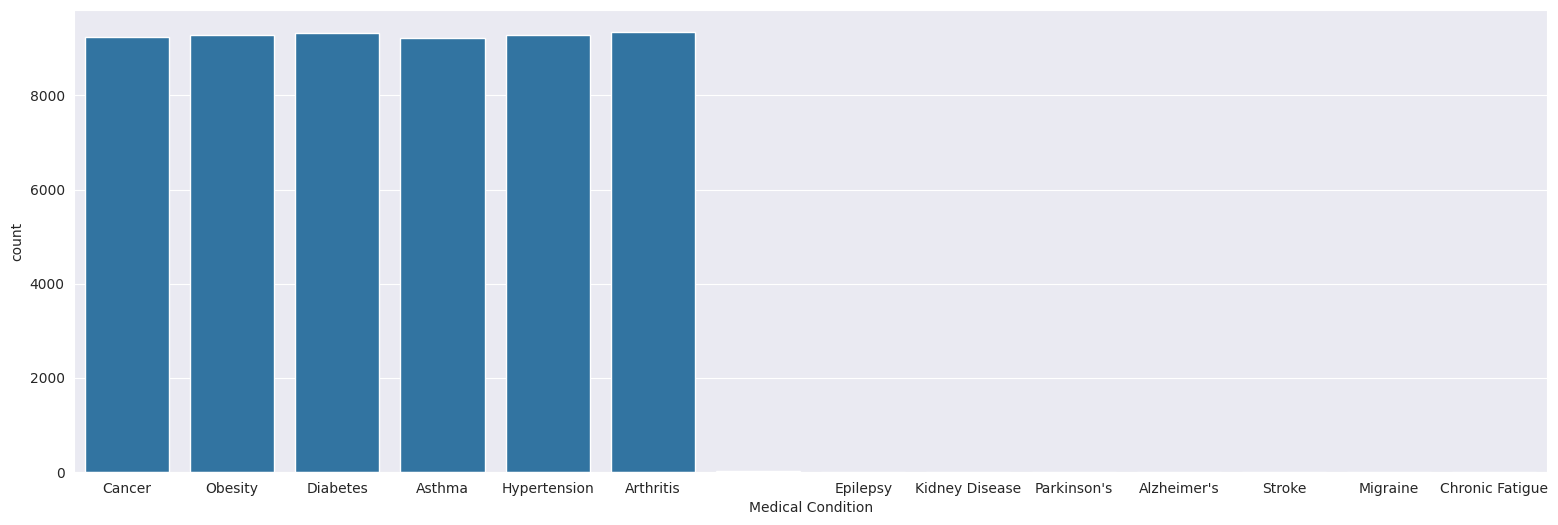

In [ ]:
# Visualizing number of patients according to their medical condition
plt.rcParams["figure.figsize"] = [19,6]
sea.set_style("darkgrid")
sea.countplot(x = health_data["Medical Condition"])

In [ ]:
health_data["Medical Condition"].value_counts()

,count
Medical Condition,
Arthritis,9356
Diabetes,9323
Hypertension,9292
Obesity,9281
Cancer,9253
Asthma,9230
,18
Epilepsy,1
Kidney Disease,1


From the visual and the value count, we can see that a large concentration of patients in our dataset have either 'Arthritis', 'Diabetes', 'Hypertension', 'Obesity', 'Cancer' or 'Asthma'. Training a model using the remaining medical conditions would be pointless because they only contain one record each - these single-value data points cannot provide enough information for our model to learn any meaningful patterns or relationships. These values can also introduce noise in the data which may lead to overfitting.

In [ ]:
# These are the steps we are going to take to drop the single values and empty records from our dataset
# First we create a data frame where we group our data by the 'Medical Condition' feature
grouped_df = health_data.groupby('Medical Condition')

# This next line uses the filter function, with the filter criteria specified in the lambda expression
# If the number of records per medical condition in the group is greater than one hundred, the medical condition is added to 'filtered_df'
filtered_df = grouped_df.filter(lambda x: len(x) > 100)

# Here, we create two sets based on the indexes of each record in our two dataframes. Note, in a set, all values must be unique
# Thereafter, we get the difference between the two sets
# The index labels that were filtered out in the previous step are added to the 'index to drop' set and are subsequently dropped
index_to_drop = set(health_data.index) - set(filtered_df.index)
health_data = health_data.drop(index_to_drop)

In [ ]:
health_data["Medical Condition"].value_counts()

,count
Medical Condition,
Arthritis,9356
Diabetes,9323
Hypertension,9292
Obesity,9281
Cancer,9253
Asthma,9230


In [ ]:
# Getting a summary of the 'Age' column in our dataset
health_data['Age'].describe()

,Age
count,55620.000000
mean,51.503632
std,19.623498
min,1.000000
25%,35.000000
50%,52.000000
75%,68.000000
max,89.000000


<Axes: >

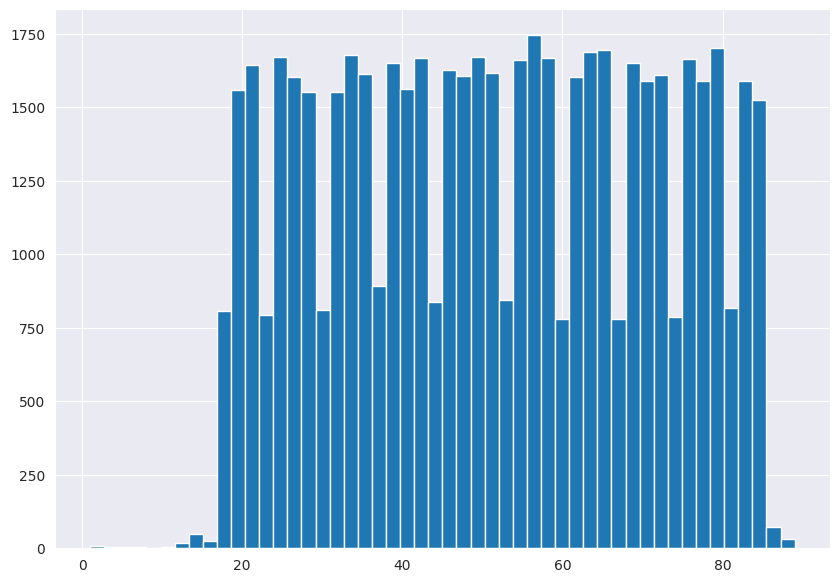

In [ ]:
# Visualizing the age distribution of our patients
plt.rcParams["figure.figsize"] = [10,7]
sea.set_style("darkgrid")
health_data.Age.hist(bins=50)

From this visual we can deduce that our patient records age ranges were from people in their late teenage years to individuals in their 80's and even 90's. The mean age tells us that it is on average, people in their 50's, give or take, that frequently visit the hospital. There isn't much we can infer from this data, except for the fact that people in their 20's and above are more likely to suffer from one of our most recorded medical conditions.
ie: Arthritis, Diabetes, Hypertension, Obesity, Cancer and Asthma.

### **3. Bivariate data analysis**

This type of analysis examines the relationship between two variables

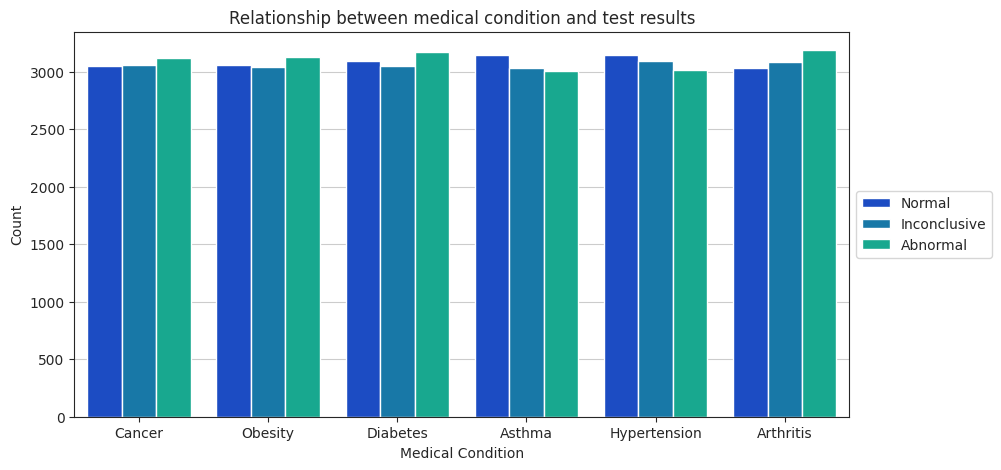

In [ ]:
# Investigating the relationship between medical condition and test results
# Set Gridlines
sea.set_style("ticks",{'axes.grid' : True})

plt.figure(figsize=(10, 5))
plt.title("Relationship between medical condition and test results")
plt.xlabel("Medical Condition")
plt.ylabel("Count")

figure_1 = sea.countplot(
    data=health_data,
    x='Medical Condition',
    hue='Test Results',
    palette="winter",
    legend=True,
)

# Change the location of the legend
figure_1.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=True)

From our figer, we can see that most patients with Cancer, Obesity, Diabetes and Arthritis were recorded to have 'Abnormal' test results, which is what we expect. However, for medical conditions like Asthma and Hypertension, our patients had normal test results, which means that, to diagnose these medical conditions, we will have to consider other features beyond analyzing the test results.

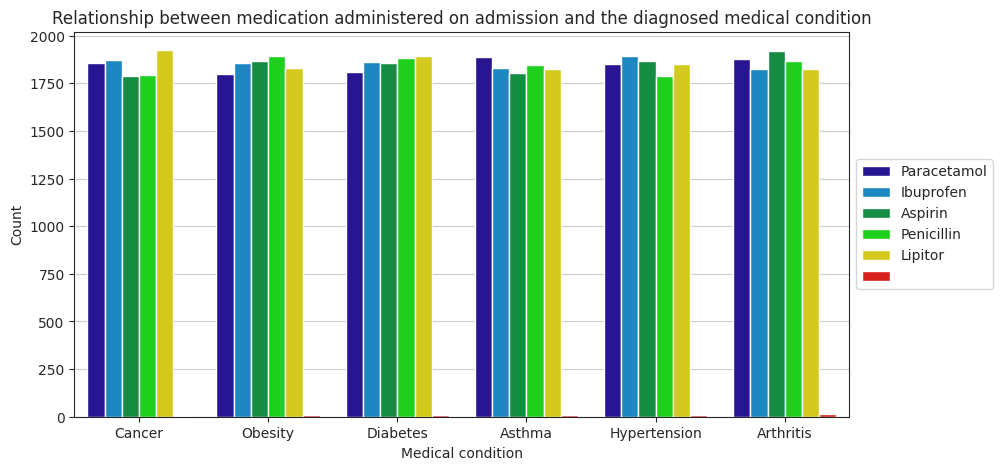

In [ ]:
# Investigating the relationship between medication administered and the patient medical condition
# Set Gridlines
sea.set_style("ticks",{'axes.grid' : True})

plt.figure(figsize=(10, 5))
plt.title("Relationship between medication administered on admission and the diagnosed medical condition")
plt.xlabel("Medical condition")
plt.ylabel("Count")

figure_1 = sea.countplot(
    data=health_data,
    x='Medical Condition',
    hue='Medication',
    palette="nipy_spectral",
    legend=True,
)

# Change the location of the legend
figure_1.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=True)

From our figure we can notice some expected corellation with some of our features. Aspirin is most prescribed to patients with Arthritis, a condition whose common symptoms include pain and fevers. It is also worth noting that Paracetamol and Ibuprofen, another pain relief medication is administered to patients who suffer from Cancer, Asthma, Hypertension and Arthritis - conditions where symptoms include pain and aches in certain areas of the body. We can also ses that a there are high counts for Lipitor - a drug used for lowering cholestrol and risk of heart attack - being prescribed to patients suffering from Diabetes and Hypertension.

Another interesting thing to note is some unexpected corellations. For instance, Lipitor being highly prescribed for Cancer patients.

Or for unexpected corellations that can be justified. For example, Penicilin being highly prescribed for patients with Obesity. We can assume that most patients with Obesity have a high likelyhood of contracting Type 2 Diabetes - a condition that at times is charcterized by swelling of certain body parts, specifically the feet, and this is normally treated with antibiotics like Penicilin.

I also noticed that our Medication column has a blank value that was counted as a category so I decided to remove all rows with this blank value.

In [ ]:
health_data = health_data[health_data['Medication'] != ' ']
print(health_data['Medication'].unique())

['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor' nan]


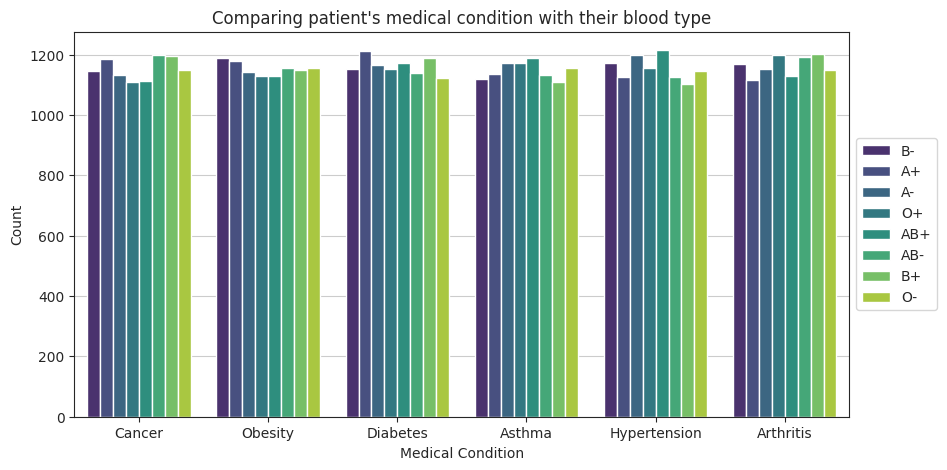

In [ ]:
# Investigating the relationship between patient blood types and their medical conditions
# Set Gridlines
sea.set_style("ticks",{'axes.grid' : True})

plt.figure(figsize=(10, 5))
plt.title("Comparing patient's medical condition with their blood type")
plt.xlabel("Medical Condition")
plt.ylabel("Count")

figure_1 = sea.countplot(
    data=health_data,
    x='Medical Condition',
    hue='Blood Type',
    palette="viridis",
    legend=True,
)

# Change the location of the legend
figure_1.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=True)

I performed this analysis to check if specific blood types are more prone to certain health conditions than others. We can see that blood types A+, AB- and B+ are more prone to Cancer. Poeple with blood type B- were more prone to Obesity. A significantly high number of patients with A+ and B+ blood types were more prone to Diabetes. AB+ / AB- and O+ are prone to Asthma. Blood types B-, A- and AB+ are more prone to Hypertension and blood types B-, O+, AB- and B+ more prone to Arthritis.

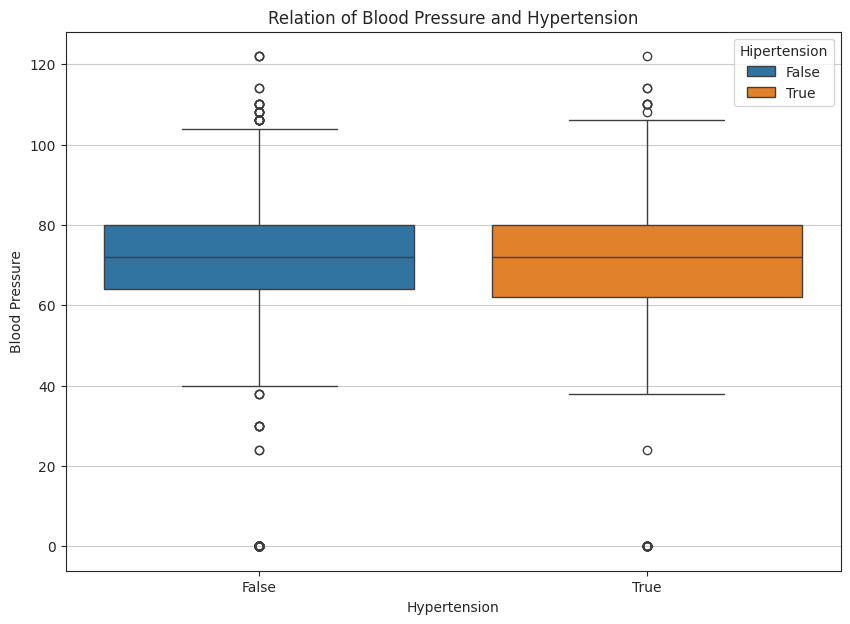

In [ ]:
# Investigating the relationship between Hypertension and Blood Pressure
# Filter out rows with missing values in our Blood Pressure column so that we can conduct a test
filtered_hypertension = health_data.dropna(subset=['Hipertension', 'BloodPressure'])

sea.boxplot(data=filtered_hypertension, x='Hipertension', y='BloodPressure', hue='Hipertension')

# Set the plot title and labels
plt.title('Relation of Blood Pressure and Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Blood Pressure')
plt.show()

The first thing you can see from this figure is an overlap, this already indicates that these two features are not as strongly related as we thought them to be. Regardless of the patients with Hypertension also having high bloood pressure readings. I chose to do this test to see if we could substitute Blood Pressure values with Hypertension values (due to the large number of missing values in the 'Blood Pressure' column) but that may not be the best approach.

### **4. Multivariate data analysis**

This type of analysis explores the relationships among multiple variables simultaneously

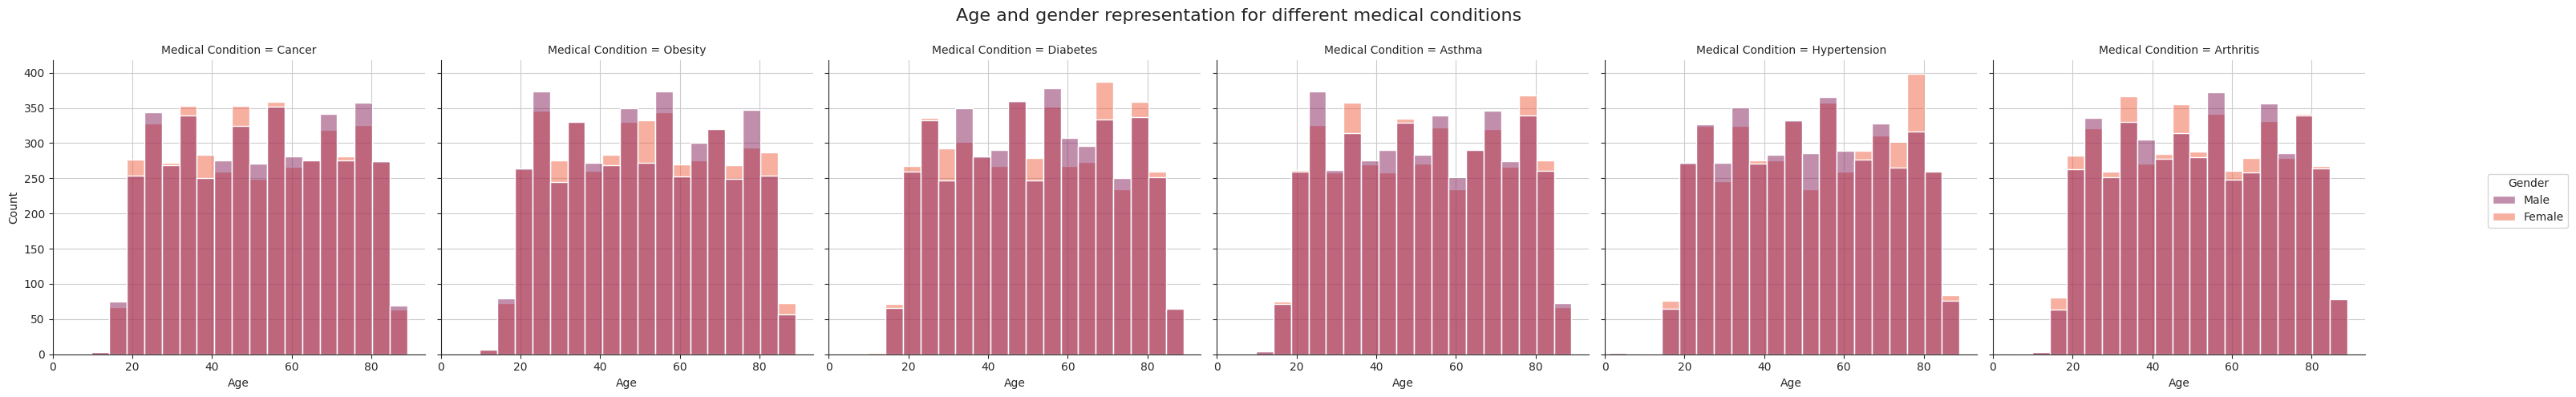

In [ ]:
# Investigating the corellation between specific medical conditions with age and gender
# Set Gridlines
sea.set_style("ticks",{'axes.grid' : True})

figure = sea.displot(
    data=health_data,
    x="Age",
    hue="Gender",
    col="Medical Condition",
    bins=20,
    palette="rocket",
    legend=True,
)

# Change the location of the legend
sea.move_legend(figure, "center left", bbox_to_anchor=(1, 0.5), frameon=True)

# Set title and axes labels
figure.set_axis_labels("Age", "Count")

# Adjust the location of the subplots and add a super title
figure.fig.subplots_adjust(top=0.85)
figure.fig.suptitle("Age and gender representation for different medical conditions", size=16)

# Set y axis lower limit to 0
figure.set(xlim=(0, None));

At first glance, we can see that the risk of contracting one of these 6 ilnesses rises significantly for individuals aged 20 years or older. From these visuals, we can see that the gender and age distributions for Cancer patients are fairly even. From the second figure we can see that women are more prone to Obesity but on the other hand, it looks like men are slightly more likely to develop Diabetes than women. The distribution for Asthma patients shows that men are more likely to contract Asthma than women. The Hypertension figure is interesting because it shows that men are more prone to this ailment when they are younger but women are more likely to develop Hypertension when they are older. Lastly, it looks like women are also more likely to develop arthritis than men, especially at a younger age.

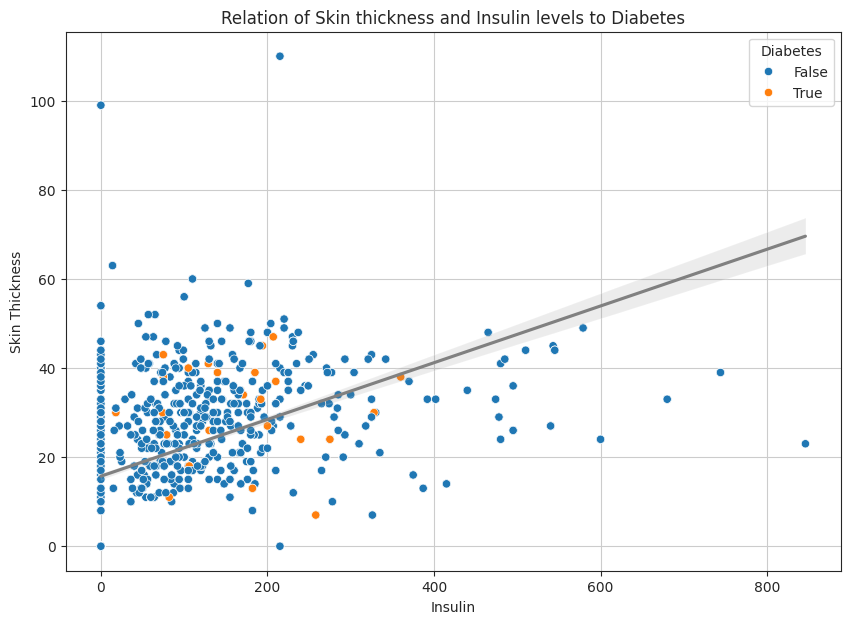

In [ ]:
# Investigating the relationship between Skin Thickness, Insulin levels and Diabetes
# Set Gridlines
sea.set_style("ticks",{'axes.grid' : True})

# Filter out rows with missing values in our Blood Pressure and Insulin columns so that we can conduct a test
filtered_diabetes = health_data.dropna(subset=['Diabetes', 'SkinThickness', 'Insulin'])

sea.scatterplot(data=filtered_diabetes,
                x='Insulin',
                y='SkinThickness',
                hue='Diabetes')

# Overlay regplot for the regression line
sea.regplot(data=filtered_diabetes,
                x='Insulin',
                y='SkinThickness',
                scatter=False,
                color='grey')

# Set the plot title, labels and show the figure
plt.title('Relation of Skin thickness and Insulin levels to Diabetes')
plt.xlabel('Insulin')
plt.ylabel('Skin Thickness')
plt.show()

I ran this analysis specifically to test if I can use the values of the 'Diabetes' column as a substitute for the 'SkinThickness' and 'Insulin' values considering there was a very high percentage of values missing from those columns.

The figure shows that there is a positive corellation between Skin Thickness and Insulin levels. It also shows that patients with Diabetes were more likely to have thicker skin especially at high insulin levels. This could be confirmed by independent research on symptoms of Type 1 and Type 2 Diabetes.

The only concerning observation is the absence of Diabetes patients where Insulin level readings are at 0 - this is the cause of Type 1 Diabetes. This might mean that these value readings may not be completely accurate.

### **5. Feature selection**

In this section i will identify the features I have selected for my subset of our data which will be used to train and test our model. I will also give some insight on why I chose these features and why I dropped other features.

The features I decided were not of intrest for my model were:
1.   SMS Received
2.   Showed Up
3.   Room Number
4.   Scholarship
5.   Doctor
6.   Hospital
7.   Insurance Provider
8.   Billing Amount
9.   Neighbourhood

I elected to drop these features because I personally did not feel like they had any significance when it came to predicting our target. Dropping these features comes with other benefits like, reducing variance and subsequently increasing our model's accuracy.

*   Name
*   Id

I have also decided to remove these two identifier variables from my dataset. This is because they not meaningful predictors for my model plus, leaving them in the model could lead to poor generalization. The pros of removing them outweigh the cons.

In [ ]:
# Calculating the percentage of missing values in the BloodPressure, SkinThickness and Insulin columns
filtered_features = health_data[['BloodPressure', 'SkinThickness', 'Insulin']]
filtered_features.isnull().sum()/len(filtered_features)*100

,0
BloodPressure,95.028825
SkinThickness,95.028825
Insulin,95.028825


I also decided to drop the three columns with the highest percentage of missing values:
*   Blood Pressure
*   Skin Thickness
*   Insulin

The main reason I chose to drop them is because more than 90 percent of their values are missing. Imputation may introduce significant levels of bias and that will lead to inaccurate predictions. A consolation I found is that some of the remaining features in the dataset, like Hypertension and Diabetes show some corellation with these features. I am hoping that, with this in mind, the accuracy of our model won't be affected too much.


In [ ]:
# It was necessary to create a function to convert date strings to datetime objects
# This is because some years were represented as 4-digit values and others were represented as 2_digit values in our dataframe
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d/%m/%Y') # First, attempt with 4-digit year format
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%d/%m/%y') # If 4-digit format fails, try 2-digit format
        except ValueError:
            return pd.NaT # If both formats fail, return NaT

# Apply the custom function to your date columns
health_data['Date of Admission'] = health_data['Date of Admission'].apply(parse_date)
health_data['Discharge Date'] = health_data['Discharge Date'].apply(parse_date)

# Calculation of admission duration
health_data['Duration of Admission'] = (health_data['Discharge Date'] - health_data['Date of Admission']).dt.days


health_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,BloodPressure,SkinThickness,Insulin,Id,Duration of Admission
0,Bobby Jackson,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,...,False,False,False,False,True,72.0,35.0,0.0,1,2.0
1,Leslie Terry,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,...,False,False,False,False,True,66.0,29.0,0.0,2,6.0
2,Danny Smith,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,...,False,False,False,False,True,64.0,0.0,0.0,3,15.0
3,Andrew Watts,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,...,False,False,False,False,True,66.0,23.0,94.0,4,30.0
4,Adrienne Bell,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,...,True,False,False,False,True,40.0,35.0,168.0,5,20.0


The next step I decided to take is to use our 'Date of Admission' and 'Discharge Date' values to calculate a 'Duration of Admission' value which I feel could be more useful for our model. This therefore allows us to drop the 'Date of Admission' and 'Discharge Date' values from our dataframe.

In [ ]:
# Checking the number of missing values in our features
missing_value_count = (health_data.isnull().sum())
print(missing_value_count)

Name                         0
Age                        110
Gender                      17
Blood Type                 185
Medical Condition            0
Date of Admission          185
Doctor                      90
Hospital                   185
Insurance Provider          41
Billing Amount             100
Room Number                185
Admission Type             103
Discharge Date             185
Medication                 122
Test Results               185
Neighbourhood                8
Scholarship                  8
Hipertension                 8
Diabetes                     8
Alcoholism                   8
Handcap                      8
SMS_received                 8
Showed_up                    8
BloodPressure            52913
SkinThickness            52913
Insulin                  52913
Id                       27244
Duration of Admission      185
dtype: int64


In [ ]:
# Dropping the columns we have chosen to eliminate
health_data_sub = health_data.drop(columns=['Name', 'Doctor', 'Hospital', 'Neighbourhood',
                                            'Id', 'SMS_received', 'Showed_up', 'Room Number',
                                            'Scholarship', 'Insurance Provider', 'Billing Amount',
                                            'BloodPressure', 'SkinThickness', 'Insulin',
                                            'Date of Admission', 'Discharge Date'])
health_data_sub.sample(5)

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Hipertension,Diabetes,Alcoholism,Handcap,Duration of Admission
20320,81.0,Male,A+,Arthritis,Elective,Lipitor,Normal,False,False,False,False,27.0
39159,38.0,Female,AB+,Obesity,Emergency,Aspirin,Abnormal,False,False,False,False,26.0
42937,29.0,Female,O-,Asthma,Urgent,Lipitor,Inconclusive,False,False,False,False,28.0
11852,36.0,Female,A+,Diabetes,Urgent,Ibuprofen,Normal,False,False,False,False,12.0
5874,79.0,Male,B-,Hypertension,Urgent,Aspirin,Inconclusive,False,False,False,False,17.0


In [ ]:
health_data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55681 entries, 0 to 55768
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    55571 non-null  float64
 1   Gender                 55664 non-null  object 
 2   Blood Type             55496 non-null  object 
 3   Medical Condition      55681 non-null  object 
 4   Admission Type         55578 non-null  object 
 5   Medication             55559 non-null  object 
 6   Test Results           55496 non-null  object 
 7   Hipertension           55673 non-null  object 
 8   Diabetes               55673 non-null  object 
 9   Alcoholism             55673 non-null  object 
 10  Handcap                55673 non-null  object 
 11  Duration of Admission  55496 non-null  float64
dtypes: float64(2), object(10)
memory usage: 5.5+ MB


### **6. Data pre-processing**

In this phase we will prepare our dataset for modeling by performing various data pre-processing techniques:
1.   Encoding
2.   Imputation
3.   Discretization
4.   Outlier handling

Our first step will be to impute the missing values in our subset. Lets start with the missing numerical variables

In [ ]:
# Checking the number of missing values in our features
missing_value_count = (health_data_sub.isnull().sum())
print(missing_value_count)

Age                      110
Gender                    17
Blood Type               185
Medical Condition          0
Admission Type           103
Medication               122
Test Results             185
Hipertension               8
Diabetes                   8
Alcoholism                 8
Handcap                    8
Duration of Admission    185
dtype: int64


In [ ]:
# Finding the mean and median values of our age variable
median = health_data.Age.median()
mean = health_data.Age.mean()

# Using mean and median values to fill in for missing 'Age' values
health_data['Median_Age'] = health_data.Age.fillna(median)
health_data['Mean_Age'] = health_data.Age.fillna(mean)

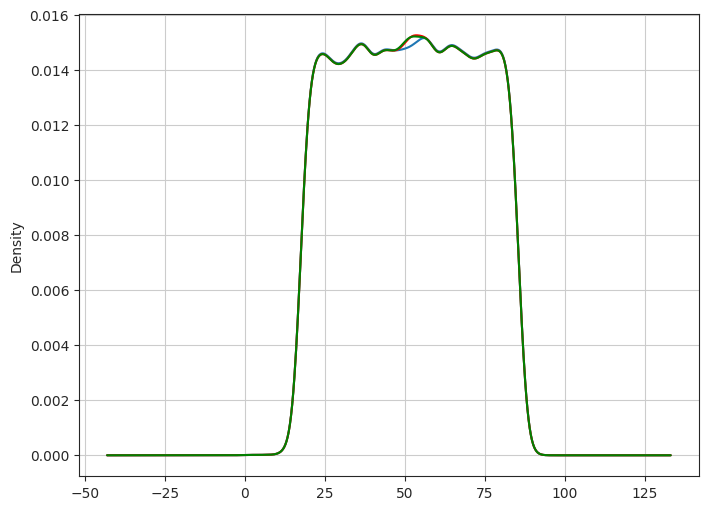

In [ ]:
#Plotting the Kernel Density Estimation figure for 'Age', mean imputation and median imputation
plt.rcParams["figure.figsize"] = [8,6]
fig = plt.figure()
ax = fig.add_subplot(111)

health_data_sub['Age'].plot(kind='kde', ax=ax)
health_data['Median_Age'].plot(kind='kde', ax=ax, color='red')
health_data['Mean_Age'].plot(kind='kde', ax=ax, color='green')

plt.show()

The figure shows that this means of imputation is almost perfect. We will impute our missing age values with median imputation.

In [ ]:
# Using the median to fill in missing 'Age' values in our dataframe
median = health_data_sub.Age.median()
health_data_sub['Age'] = health_data_sub.Age.fillna(median)

Now we move on to our 'Duration of Admission' column.

In [ ]:
# Using mean and median values to fill in for missing 'Duration of Admission' values
health_data_sub['Mean'] = health_data_sub['Duration of Admission'].fillna(health_data_sub['Duration of Admission'].mean())
health_data_sub['Median'] = health_data_sub['Duration of Admission'].fillna(health_data_sub['Duration of Admission'].median())

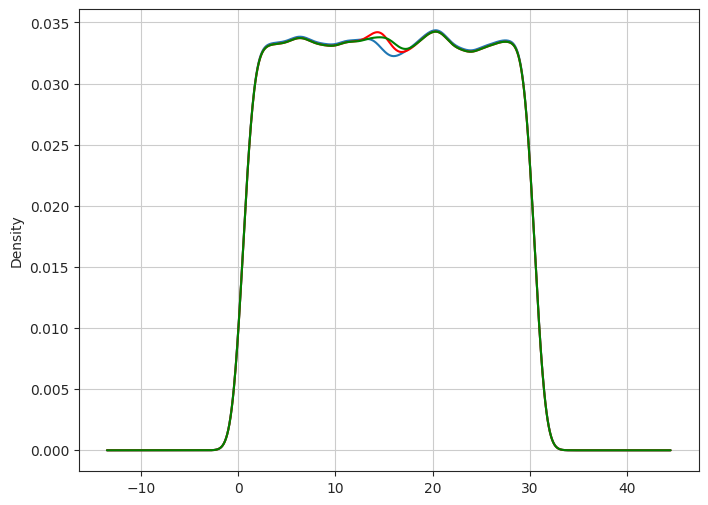

In [ ]:
#Plotting the Kernel Density Estimation figure for 'Duration of Admission', mean imputation and median imputation
plt.rcParams["figure.figsize"] = [8,6]
fig = plt.figure()
ax = fig.add_subplot(111)

health_data_sub['Duration of Admission'].plot(kind='kde', ax=ax)
health_data_sub['Median'].plot(kind='kde', ax=ax, color='red')
health_data_sub['Mean'].plot(kind='kde', ax=ax, color='green')

plt.show()

Using this visualization, it looks like mean imputation performed slightly better so we will use that for our missing values

In [ ]:
health_data_sub['Duration of Admission'] = health_data_sub['Duration of Admission'].fillna(health_data_sub['Duration of Admission'].mean())

# Dropping the added 'Mean' and 'Median' columns
health_data_sub = health_data_sub.drop(columns=['Mean', 'Median'])

In [ ]:
new_missing_value_count = (health_data_sub.isnull().sum())
print(new_missing_value_count[new_missing_value_count > 0])

Gender             17
Blood Type        185
Admission Type    103
Medication        122
Test Results      185
Hipertension        8
Diabetes            8
Alcoholism          8
Handcap             8
dtype: int64


In [ ]:
# Checking the number of unique values in each feature of the dataset
for column in health_data_sub.columns:
    unique_count = health_data_sub[column].nunique()
    print(f"{column} : {unique_count}")

Age : 84
Gender : 2
Blood Type : 8
Medical Condition : 6
Admission Type : 3
Medication : 5
Test Results : 3
Hipertension : 2
Diabetes : 2
Alcoholism : 2
Handcap : 2
Duration of Admission : 31


Now we need to impute our categorical variables. We will start with gender, hypertension, diabetes, alcoholism and handcap. I have chosen to use mode imputation for gender because the male and female values are almost equal. Also, considering the number of missing values is so low, it can be a quick way to fill those gaps. We will also include 'Admission Type' and 'Medical Condition' because they have a low number of missing values and a small selection of unique categories.

In [ ]:
health_data_sub['Gender'] = health_data_sub['Gender'].fillna(health_data_sub['Gender'].mode().iloc[0])
health_data_sub['Hipertension'] = health_data_sub['Hipertension'].fillna(health_data_sub['Hipertension'].mode().iloc[0])
health_data_sub['Diabetes'] = health_data_sub['Diabetes'].fillna(health_data_sub['Diabetes'].mode().iloc[0])
health_data_sub['Alcoholism'] = health_data_sub['Alcoholism'].fillna(health_data_sub['Alcoholism'].mode().iloc[0])
health_data_sub['Handcap'] = health_data_sub['Handcap'].fillna(health_data_sub['Handcap'].mode().iloc[0])
health_data_sub['Admission Type'] = health_data_sub['Admission Type'].fillna(health_data_sub['Admission Type'].mode().iloc[0])
health_data_sub['Medical Condition'] = health_data_sub['Medical Condition'].fillna(health_data_sub['Medical Condition'].mode().iloc[0])

<ipython-input-44-3ade441e77ad>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_data_sub['Hipertension'] = health_data_sub['Hipertension'].fillna(health_data_sub['Hipertension'].mode().iloc[0])
<ipython-input-44-3ade441e77ad>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_data_sub['Diabetes'] = health_data_sub['Diabetes'].fillna(health_data_sub['Diabetes'].mode().iloc[0])
<ipython-input-44-3ade441e77ad>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call res

For the remaining two variables, we will perform some analysis before we decide on the imputation method we should use. This involves plotting side by side frequency distribution charts for our two features.

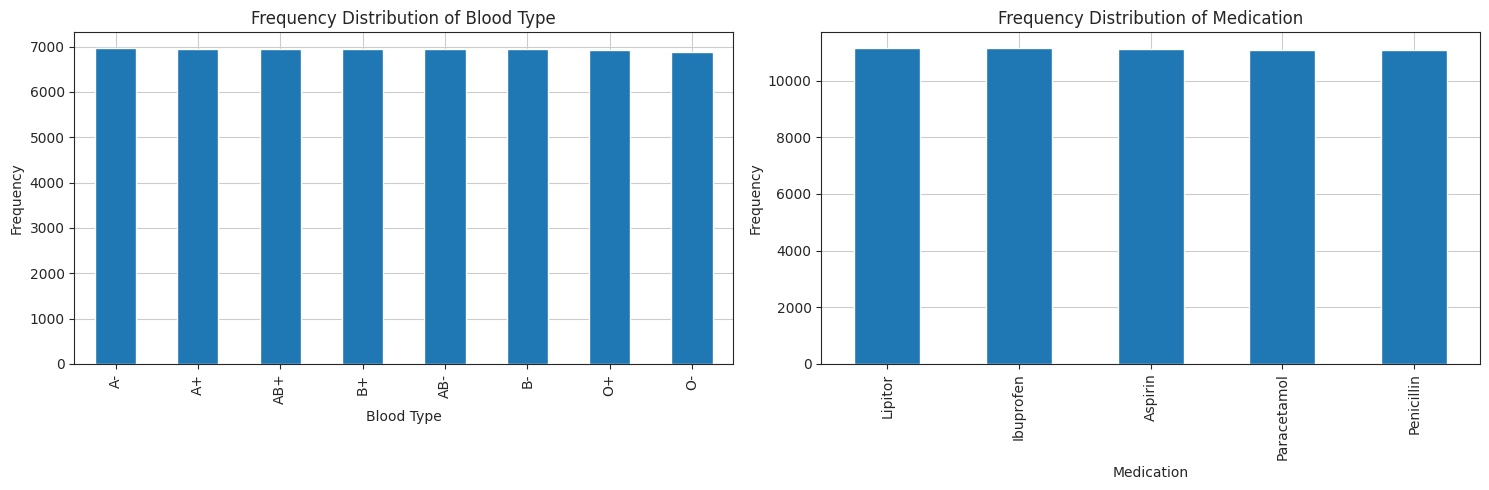

In [ ]:
# Specifying the columns we want to visualize
columns_for_plot = ['Blood Type', 'Medication']

# Creating a dictionary for the frequency distributions for each column
frequency_data = {column: health_data_sub[column].value_counts() for column in columns_for_plot}

#Creating a figure with a 1 x 2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterating through each instance in our dictionary and plotting the frequency distribution data for each instance
for i in range(len(columns_for_plot)):
    column = columns_for_plot[i]
    frequency_data[column].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The plots show that the categories in each of our features occur in roughly equal frequencies. Taking this and the fact that the missing values are less than 1 percent of our dataframe into account, I have decided that mode imputation will be okay for Medication

For Blood Type we are going to use random category imputation. This is because the amount of missing data is small and the distribution is not skewed. We can see that A- blood type occurs slightly more than the other blood types so imputing with a random category in this case will introduce some randomness to our data without creating too much noise in the process.

In [ ]:
health_data_sub['Medication'] = health_data_sub['Medication'].fillna(health_data_sub['Medication'].mode().iloc[0])
health_data_sub['Blood Type'] = health_data_sub['Blood Type'].fillna(np.random.choice(health_data_sub['Blood Type'].dropna()))

The next step is to encode our categorical variabes. We must undergo this step because models based on statistical algorithms work with numbers.

In [ ]:
for column in health_data_sub.columns:
    unique_count = health_data_sub[column].nunique()
    print(f"{column} : {unique_count}")

Age : 84
Gender : 2
Blood Type : 8
Medical Condition : 6
Admission Type : 3
Medication : 5
Test Results : 3
Hipertension : 2
Diabetes : 2
Alcoholism : 2
Handcap : 2
Duration of Admission : 31


For 'Gender', 'Hipertension', 'Diabetes', 'Alcoholism' and 'Handcap', encoding will be simpler because they only contain binary data. For this reason we are going to start encoding these columns with One-Hot Encoding.

In [ ]:
health_data_sub = pd.get_dummies(health_data_sub, columns=['Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], dtype=int)
health_data_sub.head()

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,30.0,B-,Cancer,Urgent,Paracetamol,Normal,2.0,0,1,0,1,1,0,1,0,1,0
1,62.0,A+,Obesity,Emergency,Ibuprofen,Inconclusive,6.0,0,1,1,0,1,0,1,0,1,0
2,76.0,A-,Obesity,Emergency,Aspirin,Normal,15.0,1,0,1,0,1,0,1,0,1,0
3,28.0,O+,Diabetes,Elective,Ibuprofen,Abnormal,30.0,1,0,1,0,1,0,1,0,1,0
4,43.0,AB+,Cancer,Urgent,Penicillin,Abnormal,20.0,1,0,0,1,0,1,1,0,1,0


Next we are going to encode the 'Admission Type' column. I have chosen to use label encoding for this because the three uniquie categories have an ordinal relationship - Elective to Urgent (non-life-threatening) to Emergency (life_threatening).

In [ ]:
# Although sklearn has an automatic label encoder module, I prefer to do it this way because we are working with a small number of categories
# I personally did not want to assume that the algorithm would make the same conclusion as me and encode the data the way I want it to
health_data_sub['Admission Type'] = health_data_sub['Admission Type'].map({'Elective': 0, 'Urgent': 1, 'Emergency': 2})
health_data_sub.head()

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,30.0,B-,Cancer,1,Paracetamol,Normal,2.0,0,1,0,1,1,0,1,0,1,0
1,62.0,A+,Obesity,2,Ibuprofen,Inconclusive,6.0,0,1,1,0,1,0,1,0,1,0
2,76.0,A-,Obesity,2,Aspirin,Normal,15.0,1,0,1,0,1,0,1,0,1,0
3,28.0,O+,Diabetes,0,Ibuprofen,Abnormal,30.0,1,0,1,0,1,0,1,0,1,0
4,43.0,AB+,Cancer,1,Penicillin,Abnormal,20.0,1,0,0,1,0,1,1,0,1,0


I also decided to perform label encoding on my 'Test Results' column because I judged the categories to be, in a way, ordinal.
*   Normal (negative - tests did not find the problem that was being tested for / anything out of the ordinary)
*   Inconclusive (neither positive or negative)
*   Abnormal (potitive - tests found peculiarities / the problem that was being tested for)



In [ ]:
# I decided to use the LabelEncoder from sklearn for this step
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
health_data_sub['Test Results'] = le.fit_transform(health_data_sub['Test Results'])
health_data_sub.head(5)

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,30.0,B-,Cancer,1,Paracetamol,2,2.0,0,1,0,1,1,0,1,0,1,0
1,62.0,A+,Obesity,2,Ibuprofen,1,6.0,0,1,1,0,1,0,1,0,1,0
2,76.0,A-,Obesity,2,Aspirin,2,15.0,1,0,1,0,1,0,1,0,1,0
3,28.0,O+,Diabetes,0,Ibuprofen,0,30.0,1,0,1,0,1,0,1,0,1,0
4,43.0,AB+,Cancer,1,Penicillin,0,20.0,1,0,0,1,0,1,1,0,1,0


Before I proceed with encoding the three remaining categorical columns, I decided to perform discretization on my continuous numerical features - 'Age' and 'Duration of admission'

I am doing this first because I plan on splitting the dataset into two different sets. On one set I will use frequency encoding and on the other set I will use one-hot encoding, on my three remaining variables. This is with the aim of finding out which one will perform better, considering one-hot encoding will create a dataset with significantly higher dimensionality than the other.

However, before we do any of this, we will have to handle the outliers for our continuous variables.

<Axes: ylabel='Age'>

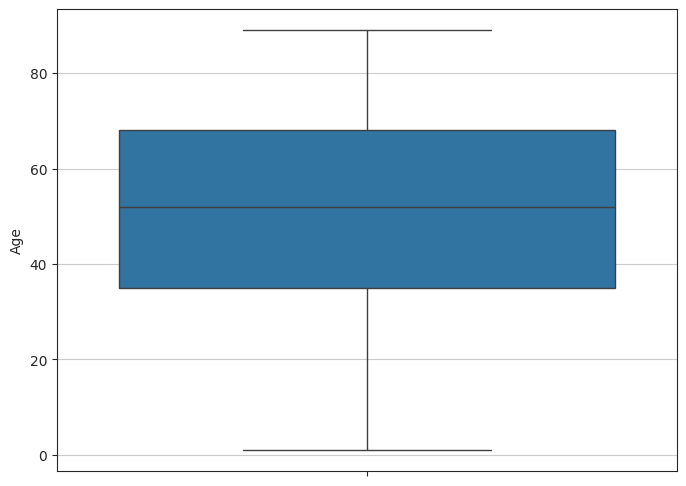

In [ ]:
#Starting with handling outliers in the 'Age' column
sea.boxplot(y=health_data_sub['Age'])

This figure shows us that our age column does not have any outliers so this saves us some time.

<Axes: ylabel='Duration of Admission'>

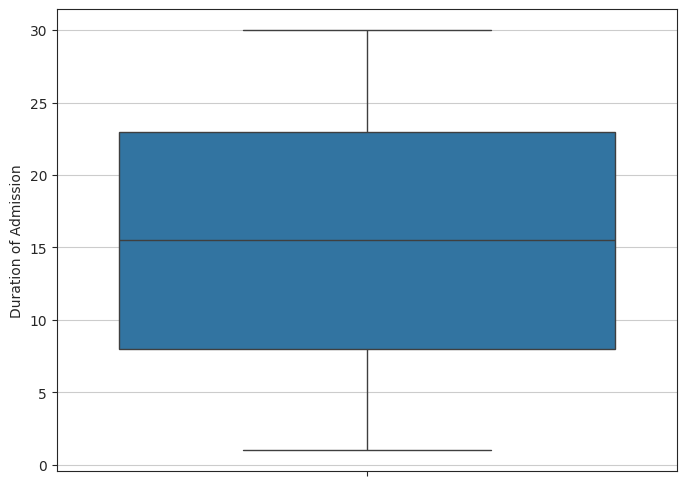

In [ ]:
# Checking the 'Duration of admission' column
sea.boxplot(y=health_data_sub['Duration of Admission'])

Again, great news because our 'Duration of Admission' column does not have any outliers. This means we can move on to discretization of our continuous numerical variables. For age and duration of admission, we will use equal width discretization. We have chosen this approach because neither feature has any outliers and the distribution of the values of each feature is relatively uniform.

In [ ]:
health_data_sub['Age'].describe()

,Age
count,55681.00000
mean,51.52192
std,19.59313
min,1.00000
25%,35.00000
50%,52.00000
75%,68.00000
max,89.00000


In [ ]:
# Calculating the age range
age_range = health_data_sub["Age"].max() - health_data_sub["Age"].min()
print(age_range)

88.0


In [ ]:
# Calculating the upper and lower interval values
lower_interval = int(np.floor(health_data_sub["Age"].min()))
upper_interval = int(np.ceil(health_data_sub["Age"].max()))

interval_length = int(np.round(age_range / 9))
print(lower_interval)
print(upper_interval)
print(interval_length)

1
89
10


In [ ]:
# Calculating number of bins
total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
print(total_bins)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


In [ ]:
# Adding label names to our bins
bin_labels = [i for i in range(1, len(total_bins))]
print(bin_labels)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Consolidating our bins into the dataset
health_data_sub["Age"] = pd.cut(health_data_sub["Age"], bins=total_bins, labels=bin_labels, include_lowest=True)
health_data_sub.head()


,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,3,B-,Cancer,1,Paracetamol,2,2.0,0,1,0,1,1,0,1,0,1,0
1,7,A+,Obesity,2,Ibuprofen,1,6.0,0,1,1,0,1,0,1,0,1,0
2,8,A-,Obesity,2,Aspirin,2,15.0,1,0,1,0,1,0,1,0,1,0
3,3,O+,Diabetes,0,Ibuprofen,0,30.0,1,0,1,0,1,0,1,0,1,0
4,5,AB+,Cancer,1,Penicillin,0,20.0,1,0,0,1,0,1,1,0,1,0


In [ ]:
health_data_sub['Duration of Admission'].describe()

,Duration of Admission
count,55681.000000
mean,15.509028
std,8.645411
min,1.000000
25%,8.000000
50%,15.509028
75%,23.000000
max,30.000000


In [ ]:
# Calculating the admission duration range
adm_range = health_data_sub['Duration of Admission'].max() - health_data_sub['Duration of Admission'].min()
print(adm_range)

29.0


In [ ]:
# Calculating the upper and lower interval values
lower_interval = int(np.floor(health_data_sub['Duration of Admission'].min()))
upper_interval = int(np.ceil(health_data_sub['Duration of Admission'].max()))

interval_length = int(np.round(adm_range / 3))
print(lower_interval)
print(upper_interval)
print(interval_length)

1
30
10


In [ ]:
# Calculating number of bins
total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
print(total_bins)

[1, 11, 21, 31]


In [ ]:
# Adding label names to our bins
bin_labels = [i for i in range(1, len(total_bins))]
print(bin_labels)

[1, 2, 3]


In [ ]:
# Consolidating our bins into the dataset
# Converting 'Duration of Admission' back to numeric before applying pd.cut
health_data_sub['Duration of Admission'] = pd.to_numeric(health_data_sub['Duration of Admission'], errors='coerce')
health_data_sub['Duration of Admission'] = pd.cut(health_data_sub['Duration of Admission'], bins=total_bins, labels=bin_labels, include_lowest=True)
health_data_sub.head()

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,3,B-,Cancer,1,Paracetamol,2,1,0,1,0,1,1,0,1,0,1,0
1,7,A+,Obesity,2,Ibuprofen,1,1,0,1,1,0,1,0,1,0,1,0
2,8,A-,Obesity,2,Aspirin,2,2,1,0,1,0,1,0,1,0,1,0
3,3,O+,Diabetes,0,Ibuprofen,0,3,1,0,1,0,1,0,1,0,1,0
4,5,AB+,Cancer,1,Penicillin,0,2,1,0,0,1,0,1,1,0,1,0


Now we will create two new copies of our dataset:

Set 1 - Blood Type, Medical Condition and Medication encoded with frequency encoding

Set 2 - Blood Type, Medical Condition and Medication encoded with one-hot encoding

We will then split and test the performance of the two sets, pick the best one and we will do one final test where we return to 'health_data_sub', use the most effective version of encoding on it and add the column with the missing Insulin, Skin Thickness and Blood Pressure values we had removed.

In [ ]:
health_data_freq = health_data_sub.copy(deep=True)
health_data_freq.head()

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,3,B-,Cancer,1,Paracetamol,2,1,0,1,0,1,1,0,1,0,1,0
1,7,A+,Obesity,2,Ibuprofen,1,1,0,1,1,0,1,0,1,0,1,0
2,8,A-,Obesity,2,Aspirin,2,2,1,0,1,0,1,0,1,0,1,0
3,3,O+,Diabetes,0,Ibuprofen,0,3,1,0,1,0,1,0,1,0,1,0
4,5,AB+,Cancer,1,Penicillin,0,2,1,0,0,1,0,1,1,0,1,0


In [ ]:
# Using a for loop to map the frequency of each category per column to its categorical equivalent
for column in ['Blood Type', 'Medical Condition', 'Medication']:
    frequency_map = health_data_freq[column].value_counts().to_dict()
    health_data_freq[column] = health_data_freq[column].map(frequency_map)

health_data_freq.head()

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,3,6944,9249,1,11086,2,1,0,1,0,1,1,0,1,0,1,0
1,7,6955,9274,2,11144,1,1,0,1,1,0,1,0,1,0,1,0
2,8,6967,9274,2,11108,2,2,1,0,1,0,1,0,1,0,1,0
3,3,6917,9316,0,11144,0,3,1,0,1,0,1,0,1,0,1,0
4,5,6947,9249,1,11072,0,2,1,0,0,1,0,1,1,0,1,0


In [ ]:
health_data_ohe = health_data_sub.copy(deep=True)
health_data_ohe.head()

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True
0,3,B-,Cancer,1,Paracetamol,2,1,0,1,0,1,1,0,1,0,1,0
1,7,A+,Obesity,2,Ibuprofen,1,1,0,1,1,0,1,0,1,0,1,0
2,8,A-,Obesity,2,Aspirin,2,2,1,0,1,0,1,0,1,0,1,0
3,3,O+,Diabetes,0,Ibuprofen,0,3,1,0,1,0,1,0,1,0,1,0
4,5,AB+,Cancer,1,Penicillin,0,2,1,0,0,1,0,1,1,0,1,0


In [ ]:
# Using one-hot encoding on our remaining categorical variables
health_data_ohe = pd.get_dummies(health_data_ohe, columns=['Blood Type', 'Medical Condition', 'Medication'], dtype=int)
health_data_ohe.head()

,Age,Admission Type,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,3,1,2,1,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,7,2,1,1,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,8,2,2,2,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,3,0,0,3,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,5,1,0,2,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
!pip install mljar-supervised

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-1.1.12-py3-none-any.whl size=164358 sha256=cf5ee82dda908a4a263ceb06222870475e7a7062fecb6cc20f204ddfbf125d02
  Stored in directory: /root/.cac

In [ ]:
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

## **Test 1 - Frequency encoding**

In [ ]:
# Prepare the features (X) and target (y)
X_freq = health_data_freq.drop(columns=['Test Results'])  # Drop Outcome columns
y_freq = health_data_freq['Test Results']  # Target variable (Outcome)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_freq, y_freq, test_size=0.2, random_state=42)

# Initialize AutoML
automl = AutoML()

# Train the model
automl.fit(X_train, y_train)

# Make predictions on the test set
predictions_freq = automl.predict(X_test)

# Display the first few predictions
print(predictions_freq[:10])

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 1.116802 trained in 2.54 seconds


2_DecisionTree logloss 1.107375 trained in 29.79 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 1.11177 trained in 14.17 seconds
4_Default_NeuralNetwork logloss 1.106245 trained in 12.48 seconds
5_Default_RandomForest logloss 1.107047 trained in 7.88 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 1.1048 trained in 1.55 seconds
AutoML fit time: 80.68 seconds
AutoML best model: Ensemble
[2 0 1 1 2 1 1 0 2 0]


This is how our dataset performed when it was used to train the following models.

Note: a lower log loss is equal to better model performance

DecisionTree: log loss 1.107339.

XGBoost: log loss 1.111339.

NeuralNetwork: log loss 1.112431.

RandomForest: log loss of 1.107483.

Ensamble model: log loss 1.105108.

In [ ]:
# Get feature importance
feature_importances = automl.get_leaderboard()
print(feature_importances)

                      name      model_type metric_type  metric_value  \
0               1_Baseline        Baseline     logloss      1.116802   
1           2_DecisionTree   Decision Tree     logloss      1.107375   
2        3_Default_Xgboost         Xgboost     logloss      1.111770   
3  4_Default_NeuralNetwork  Neural Network     logloss      1.106245   
4   5_Default_RandomForest   Random Forest     logloss      1.107047   
5                 Ensemble        Ensemble     logloss      1.104800   

   train_time  
0        3.85  
1       30.84  
2       15.43  
3       13.64  
4        9.68  
5        1.55  


The ensamble model achieved the best log loss and lowest training time, meaning it is the best performing model.

In [ ]:
# Evaluating our model's performance
# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions_freq)
print("Accuracy:", accuracy)

# Calculate precision score
precision = precision_score(y_test, predictions_freq, average='weighted')
print("Precision:", precision)

# Calculate recall score
recall = recall_score(y_test, predictions_freq, average='weighted')
print("Recall:", recall)

Accuracy: 0.3408458292179222
Precision: 0.34373793116600404
Recall: 0.3408458292179222


Accuracy (The percentage of correct predictions)

Precision (The proportion of positive predictions that are actually positive)

Recall (The proportion of actual positive cases that are correctly identified)

All of these metrics came up to roughly 34 percent.

## **Test 2 - One-hot encoding**

In [ ]:
# Prepare the features (X) and target (y)
X_ohe = health_data_ohe.drop(columns=['Test Results'])  # Drop Outcome columns
y_ohe = health_data_ohe['Test Results']  # Target variable (Outcome)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

# Initialize AutoML
automl = AutoML()

# Train the model
automl.fit(X_train, y_train)

# Make predictions on the test set
predictions_ohe = automl.predict(X_test)

# Display the first few predictions
print(predictions_ohe[:10])

Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 1.116802 trained in 1.09 seconds


2_DecisionTree logloss 1.107336 trained in 13.86 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 1.109858 trained in 26.59 seconds
4_Default_NeuralNetwork logloss 1.10629 trained in 16.87 seconds
5_Default_RandomForest logloss 1.107212 trained in 13.69 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 1.104289 trained in 0.86 seconds
AutoML fit time: 84.0 seconds
AutoML best model: Ensemble
[2 0 1 1 0 1 2 2 2 0]


This is how our dataset performed when it was used to train the following models.

DecisionTree: log loss 1.107339 - same as frequency encoded model.

XGBoost: log loss 1.109819 - lower than frequency encoded model.

NeuralNetwork: log loss 1.111628 - roughly equal to frequency encoded model.

RandomForest: log loss of 1.107816 - roughly equal to frequency encoded model.

Ensamble model: log loss 1.104819 - lower than frequency encoded model.

In [ ]:
# Get feature importance
feature_importances = automl.get_leaderboard()
print(feature_importances)

                      name      model_type metric_type  metric_value  \
0               1_Baseline        Baseline     logloss      1.116802   
1           2_DecisionTree   Decision Tree     logloss      1.107336   
2        3_Default_Xgboost         Xgboost     logloss      1.109858   
3  4_Default_NeuralNetwork  Neural Network     logloss      1.106290   
4   5_Default_RandomForest   Random Forest     logloss      1.107212   
5                 Ensemble        Ensemble     logloss      1.104289   

   train_time  
0        1.87  
1       14.96  
2       27.85  
3       18.08  
4       14.91  
5        0.86  


It was noted that for our one-hot encoded model, the train times for Xgboost and Neural Network models were significantly higher than the frequency encoded model. However, it had a significantly faster training time for the Random forest model

In [ ]:
# Evaluating our model's performance
# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions_ohe)
print("Accuracy:", accuracy)

# Calculate precision score
precision = precision_score(y_test, predictions_ohe, average='weighted')
print("Precision:", precision)

# Calculate recall score
recall = recall_score(y_test, predictions_ohe, average='weighted')
print("Recall:", recall)

Accuracy: 0.33958875819340933
Precision: 0.3425829178786486
Recall: 0.33958875819340933


Although we got a slightly better score on percision, the model performance of the one-hot encoded dataset compared to the frequency encoded dataset are roughly the same. We will proceed with the one-hot encoded dataset for the final test.

## **Final test - Returning CCA variables and using a smaller subset**

In this test, we are going to return the Insulin, Blood Pressure and Skin Thickness values to our health_data_sub, use one-hot encodingon the remaining categorical variables and use it with our model for evaluation.

In [ ]:
columns_to_add = health_data[['BloodPressure', 'SkinThickness', 'Insulin']]
health_data_final = pd.concat([health_data_sub, columns_to_add], axis=1)
health_data_final.head()

,Age,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,Alcoholism_False,Alcoholism_True,Handcap_False,Handcap_True,BloodPressure,SkinThickness,Insulin
0,3,B-,Cancer,1,Paracetamol,2,1,0,1,0,1,1,0,1,0,1,0,72.0,35.0,0.0
1,7,A+,Obesity,2,Ibuprofen,1,1,0,1,1,0,1,0,1,0,1,0,66.0,29.0,0.0
2,8,A-,Obesity,2,Aspirin,2,2,1,0,1,0,1,0,1,0,1,0,64.0,0.0,0.0
3,3,O+,Diabetes,0,Ibuprofen,0,3,1,0,1,0,1,0,1,0,1,0,66.0,23.0,94.0
4,5,AB+,Cancer,1,Penicillin,0,2,1,0,0,1,0,1,1,0,1,0,40.0,35.0,168.0


In [ ]:
# Dropping rows where the added values are null
health_data_final = health_data_final.dropna(subset=['BloodPressure', 'SkinThickness', 'Insulin'])
health_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 0 to 2767
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    2768 non-null   category
 1   Blood Type             2768 non-null   object  
 2   Medical Condition      2768 non-null   object  
 3   Admission Type         2768 non-null   int64   
 4   Medication             2768 non-null   object  
 5   Test Results           2768 non-null   int64   
 6   Duration of Admission  2768 non-null   category
 7   Gender_Female          2768 non-null   int64   
 8   Gender_Male            2768 non-null   int64   
 9   Hipertension_False     2768 non-null   int64   
 10  Hipertension_True      2768 non-null   int64   
 11  Diabetes_False         2768 non-null   int64   
 12  Diabetes_True          2768 non-null   int64   
 13  Alcoholism_False       2768 non-null   int64   
 14  Alcoholism_True        2768 non-null   int64 

In [ ]:
# Converting values from float to integer
health_data_final['BloodPressure'] = health_data_final['BloodPressure'].round().astype(int)
health_data_final['SkinThickness'] = health_data_final['SkinThickness'].round().astype(int)
health_data_final['Insulin'] = health_data_final['Insulin'].round().astype(int)

<ipython-input-80-87d3c35df264>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-80-87d3c35df264>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-80-87d3c35df264>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Using one-hot encoding on our remaining categorical variables
health_data_final = pd.get_dummies(health_data_final, columns=['Blood Type', 'Medical Condition', 'Medication'], dtype=int)
health_data_final.head()

,Age,Admission Type,Test Results,Duration of Admission,Gender_Female,Gender_Male,Hipertension_False,Hipertension_True,Diabetes_False,Diabetes_True,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,3,1,2,1,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,7,2,1,1,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,8,2,2,2,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,3,0,0,3,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,5,1,0,2,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


Last step before we proceed with our test is discretization. I have decided to do equal width discretization on the three numerical features that I introduced (BloodPressure, SkinThickness and Insulin). The decision to discretize these rows was made with the aim of improving model performance. It was also noted that the range of 'Insulin' values was very high compared to 'Blood Pressure' and 'Skin Thickness'.

In [ ]:
for column in ['BloodPressure', 'SkinThickness', 'Insulin']:
    # Calculate range and interval length
    column_range = health_data_final[column].max() - health_data_final[column].min()
    lower_interval = int(np.floor(health_data_final[column].min()))
    upper_interval = int(np.ceil(health_data_final[column].max()))
    interval_length = int(np.round(column_range / 10))

    # Create bins and labels
    total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
    bin_labels = [i for i in range(1, len(total_bins))]

    # Discretize the column
    health_data_final[column] = pd.cut(health_data_final[column], bins=total_bins, labels=bin_labels, include_lowest=True)

In [ ]:
# Prepare the features (X) and target (y)
X = health_data_final.drop(columns=['Test Results'])  # Drop Outcome columns
y = health_data_final['Test Results']  # Target variable (Outcome)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AutoML
automl = AutoML()

# Train the model
automl.fit(X_train, y_train)

# Make predictions on the test set
predictions = automl.predict(X_test)

# Display the first few predictions
print(predictions[:10])

AutoML directory: AutoML_3
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 1.098085 trained in 0.7 seconds


2_DecisionTree logloss 1.511075 trained in 6.57 seconds
3_Linear logloss 1.229945 trained in 1.56 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 1.100061 trained in 1.34 seconds
5_Default_NeuralNetwork logloss 1.384736 trained in 2.16 seconds
6_Default_RandomForest logloss 1.130882 trained in 4.03 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 1.098085 trained in 0.38 seconds
AutoML fit time: 29.68 seconds
AutoML best model: 1_Baseline
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Get feature importance
feature_importances = automl.get_leaderboard()
print(feature_importances)

                      name      model_type metric_type  metric_value  \
0               1_Baseline        Baseline     logloss      1.098085   
1           2_DecisionTree   Decision Tree     logloss      1.511075   
2                 3_Linear          Linear     logloss      1.229945   
3        4_Default_Xgboost         Xgboost     logloss      1.100061   
4  5_Default_NeuralNetwork  Neural Network     logloss      1.384736   
5   6_Default_RandomForest   Random Forest     logloss      1.130882   
6                 Ensemble        Ensemble     logloss      1.098085   

   train_time  
0        1.75  
1        7.65  
2        2.66  
3        3.07  
4        3.69  
5        5.16  
6        0.38  


Across the board, training times for this dataset were significantly lower but that was expected considering this dataset is roughly a 5 percent subset of the original.

We can also see from the logloss values that the model performance was relatively poor using this reduced dataset, especially for the decision tree and neural network models.

In [ ]:
# Evaluating our model's performance
# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision score
precision = precision_score(y_test, predictions, average='weighted')
print("Precision:", precision)

# Calculate recall score
recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)

Accuracy: 0.3700361010830325
Precision: 0.13692671610473223
Recall: 0.3700361010830325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


The biggest surprise however is that this dataset had a significantly higher accuracy and recall value than the models trained using our frequency encoding and one-hot encoding datasets. This means that the model trained with this data is good at identifying positive instances and rarely misses them. However, because of its low percision, it means it has a high 'false-positive' rate. This most of the positive instances that it finds are usually incorrect.